# Linear Regression with PyTorch

### Step 1: Generate the data

In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

RAN_SEED = 392

In [2]:
x = torch.linspace(1,50,50).reshape(-1, 1)
print(x[:5]) # Front
print(x[-5:]) # Back

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
tensor([[46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [3]:
torch.manual_seed(RAN_SEED)
noise = torch.randint(-10,10 + 1,(50,1),dtype=torch.float)
print(noise[:5]) # Show some of the data

tensor([[ 0.],
        [ 8.],
        [ 1.],
        [-3.],
        [ 9.]])


In [4]:
y = 1.5 * x + 5 + noise
print(y.shape)
print(y[:5])

torch.Size([50, 1])
tensor([[ 6.5000],
        [16.0000],
        [10.5000],
        [ 8.0000],
        [21.5000]])


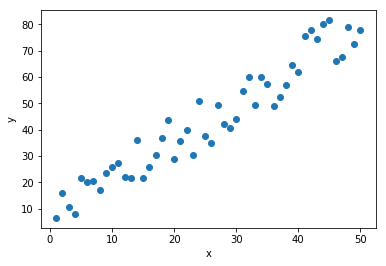

In [5]:
plt.scatter(x.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

### Step 2: Create a Linear Model

In [6]:
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        return self.linear(x)

In [7]:
torch.manual_seed(RAN_SEED)
model = LinearModel(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: -0.10186433792114258
Bias:   0.3031400442123413


In [8]:
x_line = np.array([x.min(),x.max()])
iw, ib = model.linear.weight.item(), model.linear.bias.item()

y_line = x_line * iw + ib
print(y_line)

[ 0.2012757 -4.7900767]


Text(0.5, 0, 'x')

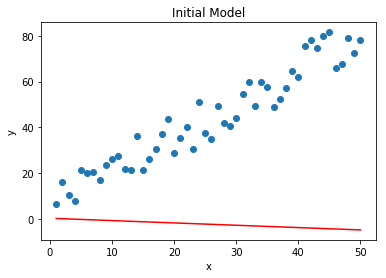

In [9]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(x_line,y_line,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x')

In [10]:
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

### Step 3: Train the Model

In [11]:
epochs = 15
losses = []

for i in range(epochs):
    i += 1 # Start at 1, not 0
    y_pred = model.forward(x)
    loss = loss_func(y_pred, y)
    losses.append(loss)
    
    print(f'epoch: {i:2}  loss {loss.item():10.8f}  \
    weight: {model.linear.weight.item():10.8f})  \
    bias: {model.linear.bias.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss 2637.57202148      weight: -0.10186434)      bias: 0.30314004
epoch:  2  loss 1385.49291992      weight: 2.87935615)      bias: 0.39526883
epoch:  3  loss 739.08410645      weight: 0.73712289)      bias: 0.33517113
epoch:  4  loss 405.36038208      weight: 2.27616930)      bias: 0.38444752
epoch:  5  loss 233.06460571      weight: 1.17015982)      bias: 0.35513398
epoch:  6  loss 144.10839844      weight: 1.96466362)      bias: 0.38228557
epoch:  7  loss 98.17743683      weight: 1.39361954)      bias: 0.36886314
epoch:  8  loss 74.45882416      weight: 1.80374277)      bias: 0.38459080
epoch:  9  loss 62.20771790      weight: 1.50888228)      bias: 0.37937075
epoch: 10  loss 55.87685394      weight: 1.72056341)      bias: 0.38919902
epoch: 11  loss 52.60242081      weight: 1.56828690)      bias: 0.38821188
epoch: 12  loss 50.90592575      weight: 1.67751956)      bias: 0.39499283
epoch: 13  loss 50.02405167      weight: 1.59885383)      bias: 0.39618933
epoch: 14  loss 

### Step 4: Examine Results

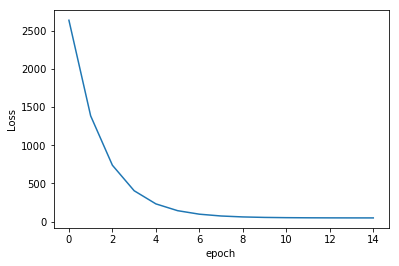

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [13]:
fw,fb = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {fw:.8f}, Current bias: {fb:.8f}')

final_line = x_line * fw + fb
print(final_line)

Current weight: 1.64357018, Current bias: 0.40810898
[ 2.0516791 82.586624 ]


Text(0.5, 0, 'x')

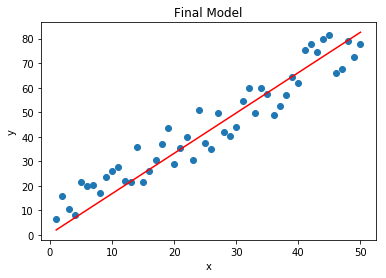

In [14]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(x_line,final_line,'r')
plt.title('Final Model')
plt.ylabel('y')
plt.xlabel('x')